#Testing the coefficients in a real simulation where the feedback is generated by the readout.

In [1]:
# Makes possible to show the output from matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

# plt.rcParams['figure.figsize'] = 5, 10

import numpy
import sys
import os
import scipy
from scipy import stats

import save_load_file as slf

##Measuring the difference between the generated curves
$MeanDistance=\frac{1}{N} \sum \limits_{n=1}^{N}  \lVert P_{Ideal}(n)-P_{Test}(n) \rVert$

$TotalLength=\sum \limits_{n=1}^{N}  \lVert P_{Ideal}(n)-P_{Ideal}(n-1) \rVert$

$METRIC=\frac{MeanDistance}{TotalLength}$

In [3]:
sim_set = "set_xx"
base_dir = "2DofArm_simulation_data"

In [4]:
tji=1

In [5]:
# This is for the joint curves

# METRIC_t[noiselevel,decimationlevel,trial,joint]
# noiselevel = 0,1,2
# decimationlevel = 0,1,2
# trial = 1 to 5
# joint = 0,1
METRIC_t=slf.load_from_file("./"+base_dir+"/"+sim_set+"/metric_torques_trajectory_"+str(tji)+".pickles")
# METRIC_t[0,:,:,0].mean(axis=1)

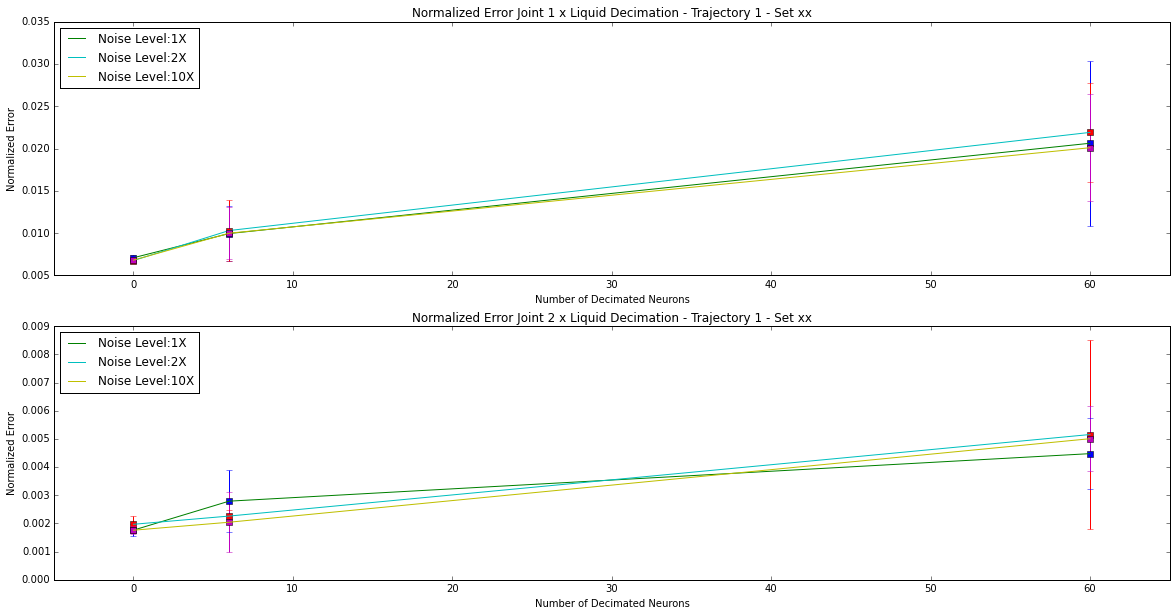

In [6]:
plt.figure(figsize =(20,10))
plt.subplot(211)
for noiselevel in range(3):
    plt.errorbar([0,6,60],METRIC_t[noiselevel,:,:,0].mean(axis=1), METRIC_t[noiselevel,:,:,0].std(axis=1), linestyle='None', marker='s')
    plt.plot([0,6,60],METRIC_t[noiselevel,:,:,0].mean(axis=1), label="Noise Level:"+str([1,2,10][noiselevel])+"X")
plt.xlim(-5,65)
# plt.ylim(0,.5)
plt.title("Normalized Error Joint 1 x Liquid Decimation - Trajectory "+str(tji)+" - Set " + sim_set[-2:])
plt.xlabel("Number of Decimated Neurons")
plt.ylabel("Normalized Error")
plt.legend(loc=0)

plt.subplot(212)
for noiselevel in range(3):
    plt.errorbar([0,6,60],METRIC_t[noiselevel,:,:,1].mean(axis=1), METRIC_t[noiselevel,:,:,1].std(axis=1), linestyle='None', marker='s')
    plt.plot([0,6,60],METRIC_t[noiselevel,:,:,1].mean(axis=1), label="Noise Level:"+str([1,2,10][noiselevel])+"X")
plt.xlim(-5,65)
# plt.ylim(0,.5)
plt.title("Normalized Error Joint 2 x Liquid Decimation - Trajectory "+str(tji)+" - Set " + sim_set[-2:])
plt.xlabel("Number of Decimated Neurons")
plt.ylabel("Normalized Error")
plt.legend(loc=0)
plt.show()

In [7]:
# Small p-value indicates different means (rejects the null hypotesis mean1=mean2=mean3)

print "Is the noise making any difference in the joint curves?"

print "Joint 1"
print "decimationlevel=0:",scipy.stats.f_oneway(METRIC_t[0,0,:,0],METRIC_t[1,0,:,0],METRIC_t[2,0,:,0])
print "decimationlevel=1:",scipy.stats.f_oneway(METRIC_t[0,1,:,0],METRIC_t[1,1,:,0],METRIC_t[2,1,:,0])
print "decimationlevel=2:",scipy.stats.f_oneway(METRIC_t[0,2,:,0],METRIC_t[1,2,:,0],METRIC_t[2,2,:,0])

print "Joint 2"
print "decimationlevel=0:",scipy.stats.f_oneway(METRIC_t[0,0,:,1],METRIC_t[1,0,:,1],METRIC_t[2,0,:,1])
print "decimationlevel=1:",scipy.stats.f_oneway(METRIC_t[0,1,:,1],METRIC_t[1,1,:,1],METRIC_t[2,1,:,1])
print "decimationlevel=2:",scipy.stats.f_oneway(METRIC_t[0,2,:,1],METRIC_t[1,2,:,1],METRIC_t[2,2,:,1])

Is the noise making any difference in the joint curves?
Joint 1
decimationlevel=0: (1.7827198146282113, 0.2099515706877334)
decimationlevel=1: (0.013822271797715261, 0.98628849594388701)
decimationlevel=2: (0.061366955402072695, 0.9407712572598993)
Joint 2
decimationlevel=0: (1.1414326753499691, 0.35171867177979416)
decimationlevel=1: (0.75444398591722506, 0.49132614568747573)
decimationlevel=2: (0.10713208925270649, 0.89925657605865461)


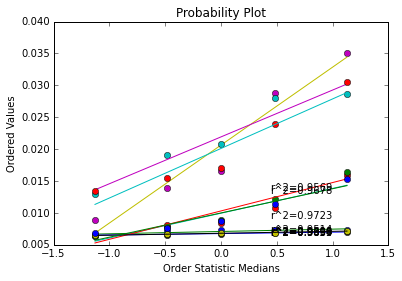

In [8]:
# Because of the big number of independent noise sources, the central limit theorem gives us reasons 
# to think the values are normally distributed...
plt.figure()
for i in range(3):
    for j in range(3):
        scipy.stats.probplot(METRIC_t[i,j,:,0].flatten(), sparams=(), dist='norm', fit=True, plot=plt);

In [9]:
# This is for the trajectory
# METRIC[noiselevel,decimationlevel,trial]
METRIC=slf.load_from_file("./"+base_dir+"/"+sim_set+"/metric_trajectory_trajectory_"+str(tji)+".pickles")

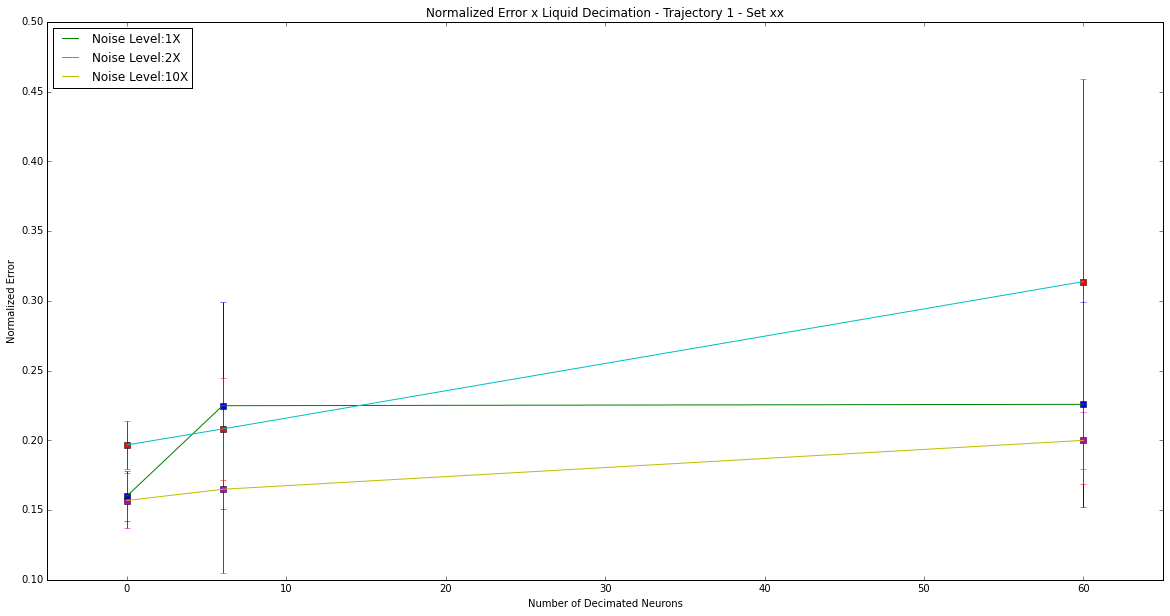

In [10]:
plt.figure(figsize =(20,10))
for noiselevel in range(3):
    plt.errorbar([0,6,60],METRIC[noiselevel,:,:].mean(axis=1), METRIC[noiselevel,:,:].std(axis=1)/numpy.sqrt(len(METRIC[noiselevel,:,:])), linestyle='None', marker='s')
    plt.plot([0,6,60],METRIC[noiselevel,:,:].mean(axis=1), label="Noise Level:"+str([1,2,10][noiselevel])+"X")
plt.xlim(-5,65)
# plt.ylim(0,.5)
plt.title("Normalized Error x Liquid Decimation - Trajectory "+str(tji)+" - Set " + sim_set[-2:])
plt.xlabel("Number of Decimated Neurons")
plt.ylabel("Normalized Error")
plt.legend(loc=0)
plt.show()

In [13]:
# Small p-value indicates different means (rejects the null hypotesis mean1=mean2=mean3)
print "Is the noise making any difference in the trajectories?"

print "decimationlevel=0:",scipy.stats.f_oneway(METRIC[0,0,:],METRIC[1,0,:],METRIC[2,0,:])
print "decimationlevel=1:",scipy.stats.f_oneway(METRIC[0,1,:],METRIC[1,1,:],METRIC[2,1,:])
print "decimationlevel=2:",scipy.stats.f_oneway(METRIC[0,2,:],METRIC[1,2,:],METRIC[2,2,:])

Is the noise making any difference in the trajectories?
decimationlevel=0: (array([ 1.93033648]), array([ 0.1875676]))
decimationlevel=1: (array([ 0.36646673]), array([ 0.70067506]))
decimationlevel=2: (array([ 0.53066801]), array([ 0.60139784]))


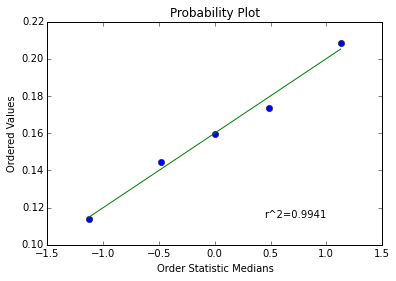

In [12]:
# Because of the big number of independent noise sources, the central limit theorem gives us reasons 
# to think the values are normally distributed...
# r is the square root of the coefficient of determination
noiselevel=0
decimationlevel=0
scipy.stats.probplot(METRIC[noiselevel,decimationlevel,:].flatten(), sparams=(), dist='norm', fit=True, plot=plt);

In [14]:
# Small p-value indicates different means (rejects the null hypotesis mean1=mean2=mean3)
print "Is the decimation making any difference in the trajectories?"

print "noiselevel=0:",scipy.stats.f_oneway(METRIC[0,0,:],METRIC[0,1,:],METRIC[0,1,:])
print "noiselevel=1:",scipy.stats.f_oneway(METRIC[1,0,:],METRIC[1,1,:],METRIC[1,1,:])
print "noiselevel=2:",scipy.stats.f_oneway(METRIC[2,0,:],METRIC[2,1,:],METRIC[2,1,:])

Is the decimation making any difference in the trajectories?
noiselevel=0: (array([ 0.49318323]), array([ 0.62253182]))
noiselevel=1: (array([ 0.05941001]), array([ 0.94259571]))
noiselevel=2: (array([ 0.01135594]), array([ 0.98871891]))


In [42]:
# print 'normaltest teststat = %6.3f pvalue = %6.4f' % scipy.stats.normaltest(METRIC[0,0,:].flatten())

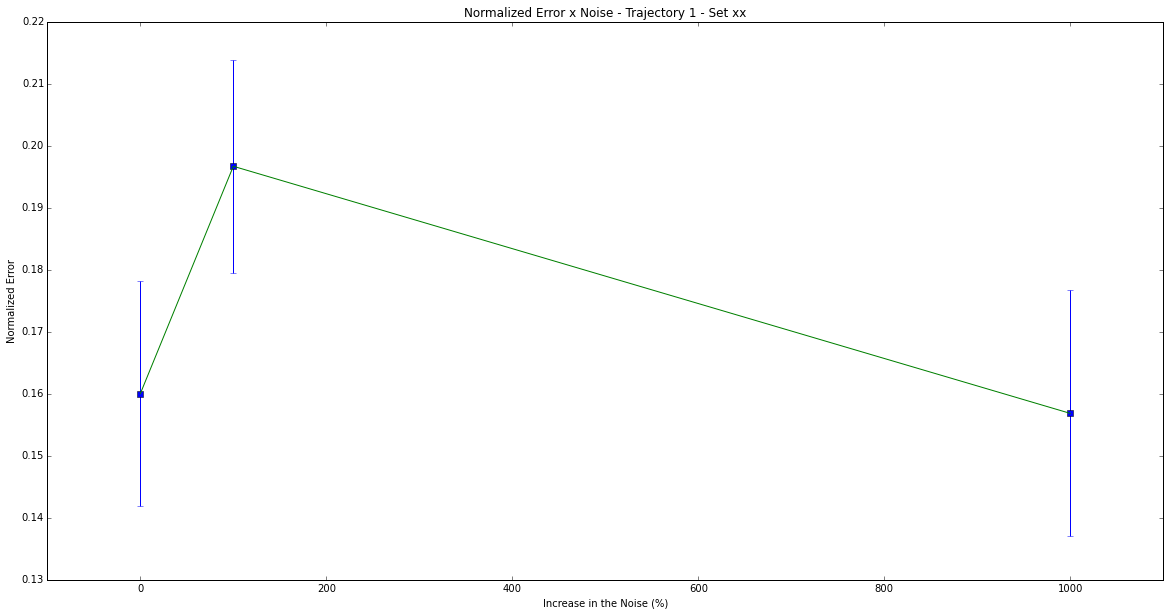

In [15]:
plt.figure(figsize =(20,10))
plt.errorbar([0,100,1000],METRIC[:,0,:].mean(axis=1), METRIC[:,0,:].std(axis=1)/numpy.sqrt(len(METRIC[:,0,:])), linestyle='None', marker='s')
plt.plot([0,100,1000],METRIC[:,0,:].mean(axis=1))
plt.xlim(-100,1100)
# plt.ylim(0,.15)
plt.title("Normalized Error x Noise - Trajectory "+str(tji)+" - Set " + sim_set[-2:])
plt.xlabel("Increase in the Noise (%)")
plt.ylabel("Normalized Error")
plt.show()